<a href="https://colab.research.google.com/github/kazimianec/TARIC/blob/master/Training_TRCtransformersSBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch


In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
print(torch.cuda.device_count())

1


In [4]:
url_TARIC_C2_descrptions = "https://raw.githubusercontent.com/kazimianec/TARIC/master/DATA/TARIC_C2_descriptions.csv"
url_TARIC_C4_descrptions ="https://raw.githubusercontent.com/kazimianec/TARIC/master/DATA/TARIC_C4_descriptions.csv"
url_TARIC_C6_descrptions ="https://raw.githubusercontent.com/kazimianec/TARIC/master/DATA/TARIC_C6_descriptions.csv"
url_TARIC_C246_descrptions = "https://raw.githubusercontent.com/kazimianec/TARIC/master/DATA/TARIC_C246_descriptions_CONCAT.csv"


In [5]:
import pandas as pd 
import io 
  
df_C2_descriptions = pd.read_csv(url_TARIC_C2_descrptions) 
df_C4_descriptions = pd.read_csv(url_TARIC_C4_descrptions)
df_C6_descriptions = pd.read_csv(url_TARIC_C6_descrptions)
df_C246_descriptions = pd.read_csv(url_TARIC_C246_descrptions)

In [6]:
for col in df_C246_descriptions.columns: 
    print(col)

CODE_2
CODE_4
CODE_6
goods_CODE_6
Description_46
Description_246
Description_46_concat
Description_246_concat


In [22]:
#sentences = df['CLASS_Description'].tolist()

sentences_C2 = df_C2_descriptions['Description_2'].tolist()
sentences_C4 = df_C4_descriptions['Description_4'].tolist()
sentences_C6 = df_C6_descriptions['Description_6'].tolist()

sentences_C246 = df_C246_descriptions['Description_246'].tolist()
sentences_C46 = df_C246_descriptions['Description_46'].tolist()

sentences_C246_concat = df_C246_descriptions['Description_246_concat'].tolist()
sentences_C46_concat = df_C246_descriptions['Description_46_concat'].tolist()

sentences = sentences_C2


**GENERATE**

In [23]:
!pip install transformers

In [8]:
from transformers import pipeline, set_seed

ModuleNotFoundError: ignored

In [ ]:
generator = pipeline('text-generation', model='gpt2')

Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
sentences[1682]

'Urea, whether or not in aqueous solution'

In [ ]:
from transformers import GPT2Tokenizer, GPT2Model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2')
text = sentences[1682]
encoded_input = tokenizer(text, return_tensors='pt')

Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
output = model(**encoded_input)
print(output)

In [ ]:
set_seed(42)
length = len(text)+1
generator("manicure", max_length=15 , num_return_sequences=10)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'manicure has to be one of them, with the fact that the'},
 {'generated_text': 'manicure has been the case for centuries. But it comes as no'},
 {'generated_text': 'manicure in the first place.] The reason that the Roman language uses'},
 {'generated_text': 'manicure.org\n\nP.C@Bridgewater-'},
 {'generated_text': 'manicure. If you go out with your pants on – say,'},
 {'generated_text': 'manicure." In this respect, the second law of the Roman republic'},
 {'generated_text': 'manicure.com). You will also need to have a valid credit'},
 {'generated_text': 'manicure. And on September 16, 2001, the United Kingdom withdrew'},
 {'generated_text': 'manicure in the United States and the West has been a focus of'},
 {'generated_text': 'manicure.\n\nThe results of the new study were described in'}]

In [9]:
!pip install sentence_transformers

     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 1.8MB 25.0MB/s 
     |████████████████████████████████| 1.2MB 60.3MB/s 
     |████████████████████████████████| 2.9MB 49.3MB/s 
     |████████████████████████████████| 890kB 56.3MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.4.1.2-cp36-none-any.whl size=103068 sha256=fe96224a33151b6cd672ca70e13aa041f1b791c7389819cef30e38e1b027cf4f
  Stored in directory: /root/.cache/pip/wheels/3d/33/d1/5703dd56199c09d4a1b41e0c07fb4e7765a84d787cbdc48ac3
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=2b73398ab4975681e2a0cdefa74b5b603969be2b30e8d8ab073d62d4f3c4b8be
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [10]:
from sentence_transformers import SentenceTransformer, util


**SBERT**
Models can be loaded from SBERT , full list:
https://docs.google.com/spreadsheets/d/14QplCdTCDwEmTqrn1LH4yrbKvdogK4oQvYO1K1aPR5M/edit#gid=0


In [11]:
#model = SentenceTransformer('average_word_embeddings_glove.840B.300d')
#model = SentenceTransformer('paraphrase-distilroberta-base-v1') --no
#model= SentenceTransformer('msmarco-distilroberta-base-v2') --no
#model = SentenceTransformer('stsb-bert-large')  ##maybe
##model = SentenceTransformer('stsb-roberta-large') --no
#model= SentenceTransformer('paraphrase-xlm-r-multilingual-v1')
#model= SentenceTransformer('LaBSE')  # interesting
#model = SentenceTransformer('quora-distilbert-multilingual') ## not ok

model = SentenceTransformer('average_word_embeddings_glove.6B.300d')

100%|██████████| 441M/441M [00:16<00:00, 27.6MB/s]


In [41]:
sentences = sentences_C4
sentences = [element.lower() for element in sentences]

#sentences[1682]+=' nail polishing makeup'
#print(sentences[1682])

In [42]:

embeddings = model.encode(sentences, convert_to_tensor=True)
#embeddings_246_concat = model.encode(sentences_246_concat, convert_to_tensor=True)
#embeddings_46_concat = model.encode(sentences_46_concat, convert_to_tensor=True)
#embeddings_246 = model.encode(sentences_246, convert_to_tensor=True)
#embeddings_46 = model.encode(sentences_46, convert_to_tensor=True)

In [43]:
TAROC_cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)
print(TAROC_cosine_scores.shape)

top_k=5
top_results = torch.topk(TAROC_cosine_scores, k=top_k)
print(TAROC_cosine_scores.shape)
print(TAROC_cosine_scores)
print(top_results.values)
#print(top_results.indices)
#print(sentences[0])
#print(sentences[40])
#y = torch.ones(TAROC_cosine_scores.shape)*0.8
#torch.where(TAROC_cosine_scores > y, TAROC_cosine_scores, 0)

torch.Size([1262, 1262])
torch.Size([1262, 1262])
tensor([[1.0000, 0.5776, 0.4561,  ..., 0.1574, 0.1939, 0.2108],
        [0.5776, 1.0000, 0.6742,  ..., 0.2578, 0.2413, 0.3303],
        [0.4561, 0.6742, 1.0000,  ..., 0.1226, 0.2232, 0.2369],
        ...,
        [0.1574, 0.2578, 0.1226,  ..., 1.0000, 0.5381, 0.5877],
        [0.1939, 0.2413, 0.2232,  ..., 0.5381, 1.0000, 0.6899],
        [0.2108, 0.3303, 0.2369,  ..., 0.5877, 0.6899, 1.0000]])
tensor([[1.0000, 0.6877, 0.6643, 0.6494, 0.6336],
        [1.0000, 0.8575, 0.8015, 0.7989, 0.7319],
        [1.0000, 0.6872, 0.6742, 0.5884, 0.5870],
        ...,
        [1.0000, 0.6519, 0.6443, 0.6227, 0.6116],
        [1.0000, 0.7102, 0.7095, 0.6991, 0.6967],
        [1.0000, 0.6899, 0.6837, 0.6799, 0.6735]])


In [30]:
import numpy as np
from sklearn import manifold
A = np.matrix(TAROC_cosine_scores)*0.9
A = 1.-A
modelTSNE = manifold.TSNE(metric="precomputed")
Y = modelTSNE.fit_transform(A) 

In [31]:
import numpy as np
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

In [44]:
tsne = TSNE()
Y = tsne.fit_transform(TAROC_cosine_scores)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


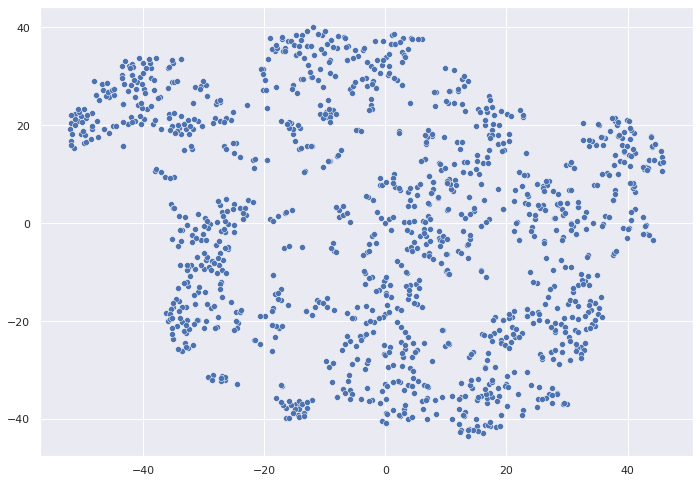

In [45]:
sns.scatterplot(Y[:,0], Y[:,1], legend='full', palette=palette) #, hue=y, legend='full', palette=palette)

In [ ]:
description = ["Vyriškos kelnės"]

description = ["Мужские джинсы"]
description = ["Beef fillet"]

description = ["Jautienos filė"]

description = ["Лак для маникюра"]

description = ["Nail polish"]

description = ["Кресла офисные"]

description = ["Astro Pneumatic 1716 Deluxe Air Blow Gun with 20-Inch Long Angled Nozzle and 1/2-Inch Removable Rubber Tip"]

description = ["Astro Pneumatic 1716 Deluxe Air Blow Gun with 20-Inch Long Angled Nozzle and 1/2-Inch Removable Rubber Tip"]
description = ["I Love Makeup - Nail Polish"]
description = ["Astro Pneumatic 1716 Deluxe Air Blow Gun with 20-Inch Long Angled Nozzle and 1/2-Inch Removable Rubber Tip"]



description = ["папиросы"]
description = ["I Love Makeup  - Nail Polish"]
description = ["Astro Pneumatic 1716 Deluxe Air Blow Gun with 20-Inch Long Angled Nozzle and 1/2-Inch Removable Rubber Tip"]
description = ["Beef fillet"]
description = ["Гoвядина филе морож"]
description = ["Мужские джинсы"]
description = ["Фанера"]
description = ["Astro Pneumatic 1716 Deluxe Air Blow Gun with 20-Inch Long Angled Nozzle and 1/2-Inch Removable Rubber Tip"]
description = ["Vineer on kihiline materjal, mis valmistatakse õhukeste puitlehtede – spoonide – kokkuliimimise teel."] 
description = ["офисные стулья деревянные дубовые"] 
description = ["Astro Pneumatic 1716 Deluxe Air Blow Gun with 20-Inch Long Angled Nozzle and 1/2-Inch Removable Rubber Tip"]
description = ["Fosmon Apple iPhone 4 / iPhone 4G USB Sync Charge Data Cable with USB Auto Car Charger and USB Home Travel Charger"] #SUPER matches S3
description = ["Astro Pneumatic 1716 Deluxe Air Blow Gun with 20-Inch Long Angled Nozzle and 1/2-Inch Removable Rubber Tip"] # not
description = ["HTC HD7 Crowned Heart Phone Protector Cover Case"] ## bullshit is both cases - bert and S3
description = ["Jolly Jumper Pashmama Nursing Cover - Tan"]
description = ["HTC HD7 Crowned Heart Phone Protector Cover Case"]
description = ["Astro Pneumatic 1716 Deluxe Air Blow Gun with 20-Inch Long Angled Nozzle and 1/2-Inch Removable Rubber Tip"]
description = ["I Love Makeup  - Nail Polish"]
description = ["Astro Pneumatic 1716 Deluxe Air Blow Gun with 20-Inch Long Angled Nozzle and 1/2-Inch Removable Rubber Tip"]
description = ["HTC HD7 Crowned Heart Phone Protector Cover Case"]


description = ["Astro Pneumatic 1716 Deluxe Air Blow Gun with 20-Inch Long Angled Nozzle and 1/2-Inch Removable Rubber Tip"]
description = ["Beef fillet"]
description = ["Astro Pneumatic 1716 Deluxe Air Blow Gun with 20-Inch Long Angled Nozzle and 1/2-Inch Removable Rubber Tip"]
description = ["Phone Protector Cover Case"]
description = ["I Love Makeup  - Nail Polish"]
description = ["Я люблю макияж - полировка для ногтей"]
description = ["Аš myliu makijažą - nagų poliravimas "]
description = ["Amo el maquillaje - Esmalte de uñas"]

#
description = ["TWS Bluetooth 5.0 Earphones 2200mAh Charging Box Wireless Headphone 9D Stereo Sports Waterproof Earbuds Headsets With Microphone"]
#https://www.aliexpress.com/item/4000539506338.html?spm=a2g01.12617084.fdpcl001.1.7fb7Er8hEr8hk8&gps-id=5547572&scm=1007.19201.130907.0&scm_id=1007.19201.130907.0&scm-url=1007.19201.130907.0&pvid=5b859c98-45fa-401b-93f9-b5b29f926246
#

#
description = ["FINETOO V Waist Cotton Panties Women M-4XL Underpants Female Underwear Sexy Low-Rise Girl Briefs Comfort Panties Ladies Lingerie"]
#https://www.aliexpress.com/item/4001256055038.html?spm=a2g01.12617084.fdpcl001.7.7fb7Er8hEr8hk8&gps-id=5547572&scm=1007.19201.130907.0&scm_id=1007.19201.130907.0&scm-url=1007.19201.130907.0&pvid=5b859c98-45fa-401b-93f9-b5b29f926246
#

embeddings_description = model.encode(description, convert_to_tensor=True )

In [ ]:
cosine_scores = util.pytorch_cos_sim(embeddings, embeddings_description)
cosine_scores.shape
values,indices = torch.transpose(cosine_scores,0,1).topk(10)
print(values, indices)
indices.numpy()[0][0]

print(values.numpy()[0][0], sentences[indices.numpy()[0][0]])
print(values.numpy()[0][1], sentences[indices.numpy()[0][1]])
print(values.numpy()[0][2], sentences[indices.numpy()[0][2]])
print(values.numpy()[0][3], sentences[indices.numpy()[0][3]])
print(values.numpy()[0][4], sentences[indices.numpy()[0][4]])

#print(sentences[1682])




tensor([[0.3965, 0.3398, 0.3275, 0.3223, 0.3215, 0.3145, 0.3051, 0.2964, 0.2932,
         0.2899]]) tensor([[841, 785, 839, 787, 783, 794, 840, 838, 782, 843]])
0.3964877 women's or girls' blouses, shirts and shirt-blouses
0.3397647 women's or girls' blouses, shirts and shirt-blouses, knitted or crocheted
0.32752764 women's or girls' suits, ensembles, jackets, blazers, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (other than swimwear)
0.3222776 women's or girls' slips, petticoats, briefs, panties, nightdresses, pyjamas, négligés, bathrobes, dressing gowns and similar articles, knitted or crocheted
0.32152882 women's or girls' suits, ensembles, jackets, blazers, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (other than swimwear), knitted or crocheted


In [ ]:
#df_C246_descriptions.iloc[indices.numpy()[0],:]
df_C4_descriptions.iloc[indices.numpy()[0],:]

,goods_code_4,Description_4,indent,CODE_2,CODE_4,CODE_6,CODE_8,CODE_10,CODE_14
841,6206000000 80,"Women's or girls' blouses, shirts and shirt-bl...",NaN,62,6,0,0,0,80
785,6106000000 80,"Women's or girls' blouses, shirts and shirt-bl...",NaN,61,6,0,0,0,80
839,6204000000 80,"Women's or girls' suits, ensembles, jackets, b...",NaN,62,4,0,0,0,80
787,6108000000 80,"Women's or girls' slips, petticoats, briefs, p...",NaN,61,8,0,0,0,80
783,6104000000 80,"Women's or girls' suits, ensembles, jackets, b...",NaN,61,4,0,0,0,80
794,6115000000 80,"Pantyhose, tights, stockings, socks and other ...",NaN,61,15,0,0,0,80
840,6205000000 80,Men's or boys' shirts,NaN,62,5,0,0,0,80
838,6203000000 80,"Men's or boys' suits, ensembles, jackets, blaz...",NaN,62,3,0,0,0,80
782,6103000000 80,"Men's or boys' suits, ensembles, jackets, blaz...",NaN,61,3,0,0,0,80
843,6208000000 80,"Women's or girls' singlets and other vests, sl...",NaN,62,8,0,0,0,80


In [ ]:
cosine_neighbours = util.pytorch_cos_sim(embeddings[indices.numpy()[0][0]], embeddings[indices.numpy()[0][9]])
print(cosine_neighbours)

tensor([[0.7505]])


**TRAINING**

In [ ]:
from sentence_transformers import SentenceTransformer, InputExample, losses
from torch.utils.data import DataLoader

#Define the model. Either from scratch of by loading a pre-trained model
t_model = model

#Define your train examples. You need more than just two examples...
#train_examples = [
#                  InputExample(texts=['Nail polish makeup', 'manicure or pedicure preparations'], label=1.),
#                  InputExample(texts=['Nail polish makeup', 'essential oils and resinoids; perfumery, cosmetic or toilet preparations'], label=1.),
#                  InputExample(texts=['Nail polish makeup', 'soap, organic surface-active agents, washing preparations, lubricating preparations, artificial waxes, prepared waxes, polishing or scouring preparations, candles and similar articles, modelling pastes'], label=0.)]

train_examples = [
                  InputExample(texts=['Nail polish makeup', 'manicure or pedicure preparations'], label=1.),
                  #InputExample(texts=['Nail polish makeup', 'essential oils and resinoids; perfumery, cosmetic or toilet preparations'], label=1.),
                  InputExample(texts=['Nail polish makeup', 'waxes'], label=0.),
                  InputExample(texts=['Nail polish makeup', 'lips'], label=0.),
                  InputExample(texts=['Nail polish makeup', 'eye'], label=0.)]



#Define your train dataset, the dataloader and the train loss
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=1)
train_loss = losses.CosineSimilarityLoss(model)

#Tune the model
t_model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=1, warmup_steps=100)

In [ ]:
t_embeddings = t_model.encode(sentences, convert_to_tensor=True)

In [ ]:
t_embeddings_description = t_model.encode(description, convert_to_tensor=True )

cosine_scores = util.pytorch_cos_sim(t_embeddings, t_embeddings_description)
cosine_scores.shape
values,indices = torch.transpose(cosine_scores,0,1).topk(10)
print(values, indices)
indices.numpy()[0][0]

print(values.numpy()[0][0], sentences[indices.numpy()[0][0]])
print(values.numpy()[0][1], sentences[indices.numpy()[0][1]])
print(values.numpy()[0][2], sentences[indices.numpy()[0][2]])
print(values.numpy()[0][3], sentences[indices.numpy()[0][3]])
print(values.numpy()[0][4], sentences[indices.numpy()[0][4]])



tensor([[0.5126, 0.5063, 0.4814, 0.4687, 0.4474, 0.4382, 0.4359, 0.4089, 0.4089,
         0.4089]]) tensor([[1713, 1680, 1712, 1681, 1682, 1684, 1707, 1699, 1701, 1700]])
0.51262975 soap, organic surface-active agents, washing preparations, lubricating preparations, artificial waxes, prepared waxes, polishing or scouring preparations, candles and similar articles, modelling pastes, 'dental waxes' and dental preparations with a basis of plaster; artificial waxes and prepared waxes; other 
0.5063278 essential oils and resinoids; perfumery, cosmetic or toilet preparations; beauty or make-up preparations and preparations for the care of the skin (other than medicaments), including sunscreen or suntan preparations; manicure or pedicure preparations; lip make-up preparations 
0.48139337 soap, organic surface-active agents, washing preparations, lubricating preparations, artificial waxes, prepared waxes, polishing or scouring preparations, candles and similar articles, modelling pastes, 'dent